- we don't have a left and right state so can eliminate all the boundary if statement stuff 
    - delete all the left states 
        - then delete all "r" in the right state names 
- U==q?? 
- par_getd gets the values from the input file in the "problem" block
-  Structs in C are like objects/classes but without methods or public/private specifications. "Members" are just instance variables.
- look into athena.h for how the object structs are defined 
- Difference between ConsS and Cons1Ds
    - except Cons1DS doesn't contain $B_x$, not relevant for our case here anyways, but why?/

- Before trying to setup the torus first run the problem and see if you could set up a constant background and get it running 

- it looks like vfr and vfl is a quantity between [0,1] that sorta tells you how much volume the fluid occupy of percentage of the cell. This is determined by a series of if else cases that figures out whtether it is half, more thna half of fully in the left or right cell, so then you use this to do volume averaging . For now since I took out that whole if else I'm just going to assume that vf=1.0, so its not necessary to be in here. But for now I'm going to put vf in as a placeholder so that if I really need  to figure out the boundary cases later I could. 


###Input File
- using athinput.shk_cloud as a template (doens't really matter) 
- nscalars 	# 	add # passively advected scalars (default is 0)
- inthis case it should be zero in the flag so default


- does the gas need to be confined in the torus shape for all time or only during the initial conditions ? (since PPI don't show up unless reflecting boundary at inner and outer boundaries 

##Running the code
- place ppi.c to ./athena/src/prob
- putting the input file just in athena directory anywhere
```
./configure --with-problem=ppi --with-gas=hydro
make all
```


Errors to be fixed: 
```
problem.c: In function ‘problem’:
problem.c:65: error: too few arguments to function ‘Prim1D_to_Cons1D’
problem.c: At top level:
problem.c:96: error: expected identifier or ‘(’ before ‘return’
problem.c:97: error: expected identifier or ‘(’ before ‘}’ token
problem.c: In function ‘problem_read_restart’:
problem.c:111: error: ‘Omega_0’ undeclared (first use in this function)
problem.c:111: error: (Each undeclared identifier is reported only once
problem.c:111: error: for each function it appears in.)
problem.c:112: error: ‘hst_rho_Vx_dVy’ undeclared (first use in this function)
problem.c:113: error: ‘hst_rho_dVy2’ undeclared (first use in this function)
problem.c: At top level:
problem.c:117: error: redefinition of ‘problem_read_restart’
problem.c:109: note: previous definition of ‘problem_read_restart’ was here
make[1]: *** [problem.o] Error 1
make[1]: Leaving directory `/u/dorislee/Programs/athena4.2/src'
make: *** [compile] Error 2
```


Fixed everything but this is weird: 
```
    problem.c:113: error: redefinition of ‘problem_read_restart’
problem.c:108: note: previous definition of ‘problem_read_restart’ was here
make[1]: *** [problem.o] Error 1
make[1]: Leaving directory `/u/dorislee/Programs/athena4.2/src'
make: *** [compile] Error 2
```
But I am not defining any structs in the code at all! (so none of the  SO solutions apply!)
- after delving this for a long time, I decided to compare this with collapse3d.c inside src/prob/ and compared this line by line to it. I noticed that my comment formatting was kind of weird then I realized that I never closed my second comment. Since there was another comment right under it, it didn't complain to me and turn everything blue, that's why I missed it. After putting that end comment */ back in it ``make all`` sucessfully now.

```
$ athena -i athinput.ppi 
Simulation started on Tue Jun 23 09:02:04 2015

### Fatal error: par_gets: Par "x3min" not found in Block "domain1"
```
I dont understand why I need to define things for x3 if I am only running this in 2D ?
But let's do it anyways min max as 0.0,0.0


Kept getting fatal error do variable not found but there is no d0 in my c code file!!!
turns out I was running --with-problem=collapse3d rather than --with-problem=ppi accidentally!

```
problem.c:101: error: redefinition of ‘problem_read_restart’
problem.c:96: note: previous definition of ‘problem_read_restart’ was here
make[1]: *** [problem.o] Error 1
make[1]: Leaving directory `/u/dorislee/Programs/athena4.2/src'
```
giving me this error again even though the comment is fixed

- I forgot to write a null function for problem_write_restart
- stil same error
- The real reason is that I defined problem_read_restart twice!! So the dual definition was what threw this off!
- Ok now everything compiles correctly and ``athena -i athinput.ppi`` runs sucessfully!

Found that visit is already installed on peyton machines :

``module load visit``
    

``visit &``

when I try plotting stuff: 

$ visit
Running: gui2.7.1
Running: viewer2.7.1 -geometry 924x974+356+25 -borders 26,4,2,2 -shift 2,26 -preshift 0,0 -defer -host 127.0.0.1 -port 5600
Running: mdserver2.7.1 -host 127.0.0.1 -port 5601
libGL error: dlopen /usr/lib64/dri/nouveau_dri.so failed (/usr/lib64/dri/nouveau_dri.so: cannot open shared object file: No such file or directory)
libGL error: unable to load driver: nouveau_dri.so
libGL error: driver pointer missing
libGL error: failed to load driver: nouveau
VisIt's viewer exited abnormally! Aborting the Graphical User Interface. VisIt's developers may be reached via the visit-users mailing list.  Please see:
        http://visit.llnl.gov/FAQ.html#1


So trying sshfx

mounted sshfx by: 

``sshfs -odebug dorislee@charon.astro.princeton.edu:/  usrp/ -o auto_cache,defer_permissions,noappledouble``

But should probably do this more deeper level than the root


In [3]:
cd ../data/constant_test/

/Users/dorislee/Desktop/usrp/u/dorislee/usrp/data/constant_test


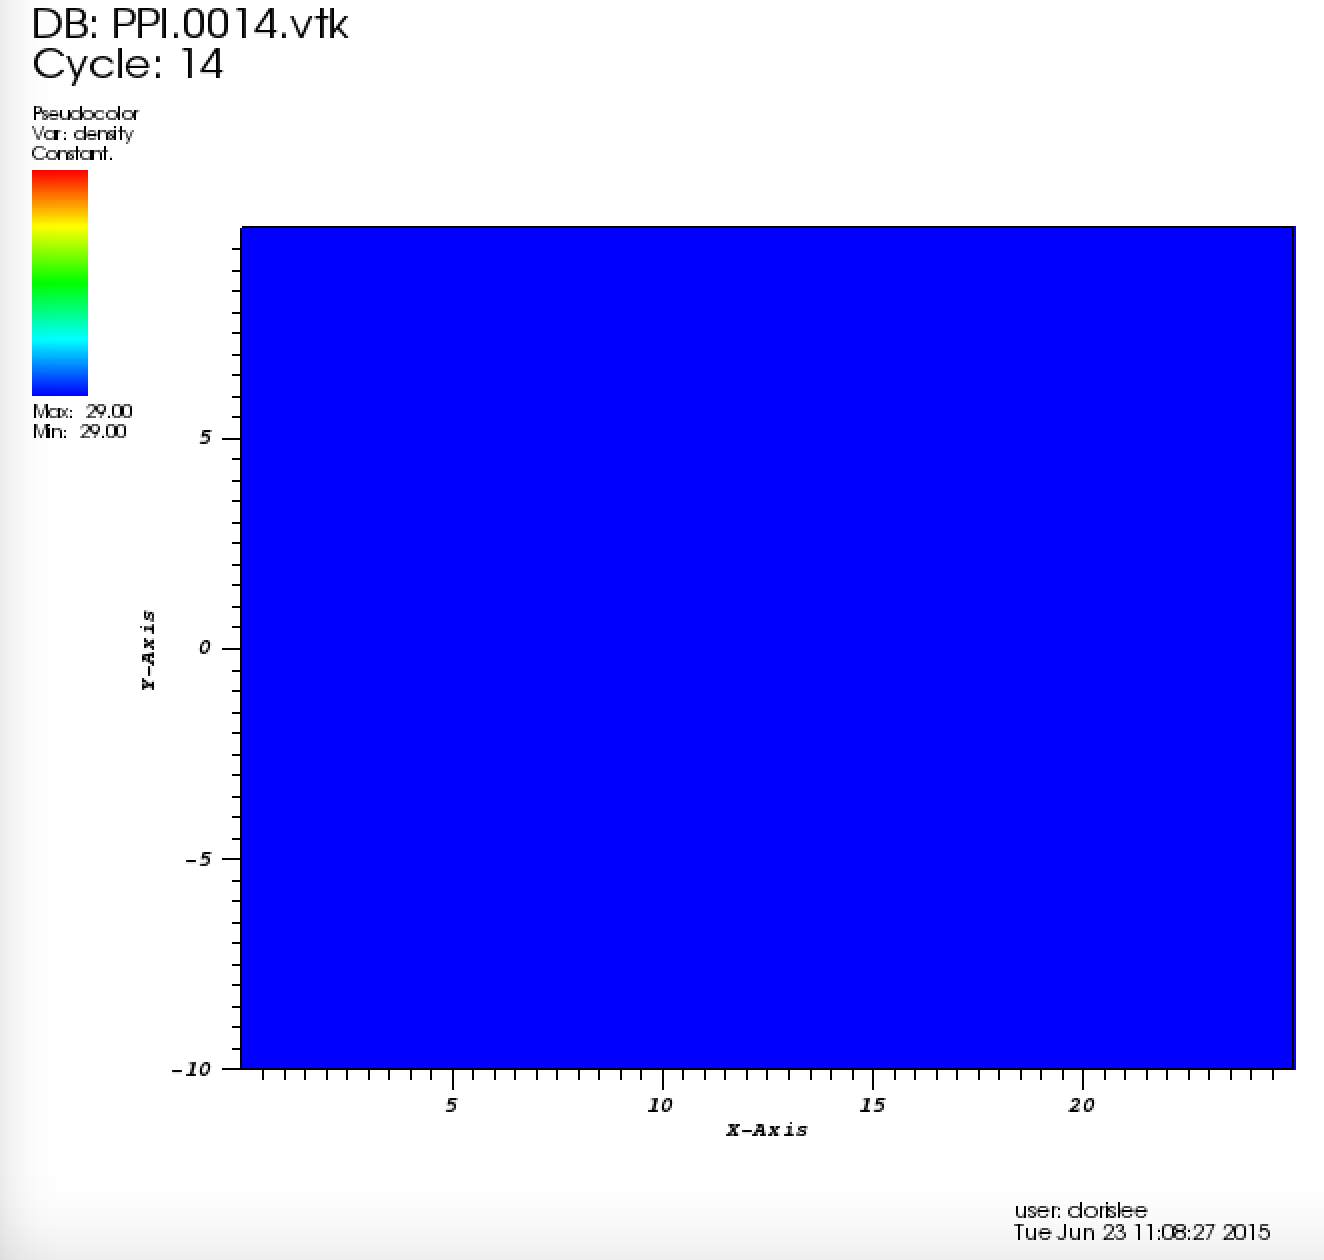

In [8]:
from IPython.display import Image
Image(filename='improved_box.png',width=500) 

verified that this is $\rho$ = 29 and P=43 as I set them to be

delete all the q and replace with U since not necessary

Now everything is working time for putting in the torus

- fp error i,j are ints
- should I be using ix1 or just i j both seem to output sane numbers?
- verified that the ix1 and i values are identical
- becareful when you print format if you %d to print a float, you will get a gigantic number , need to use %2f instead

verfified that the output is indeed correct: 

``(i,j) : (135,71)   (i1,ix2) : (135,71)   (x,y) : (135.000000,71.000000)   r: 152.531964		theta: 0.484173	p: 19441.000014``

- Changed the way U and W are put in the loop (more correct way for doing the next step)
- verified that this actually works sucessfully and we still see the same constant as expected.

- So this ran sucessfully setting a blastwave looking thing at 5,0 circle. We need to enforce boundary conditions of the torus. ANd also shifting the circle to its appropriate location at (0,c)

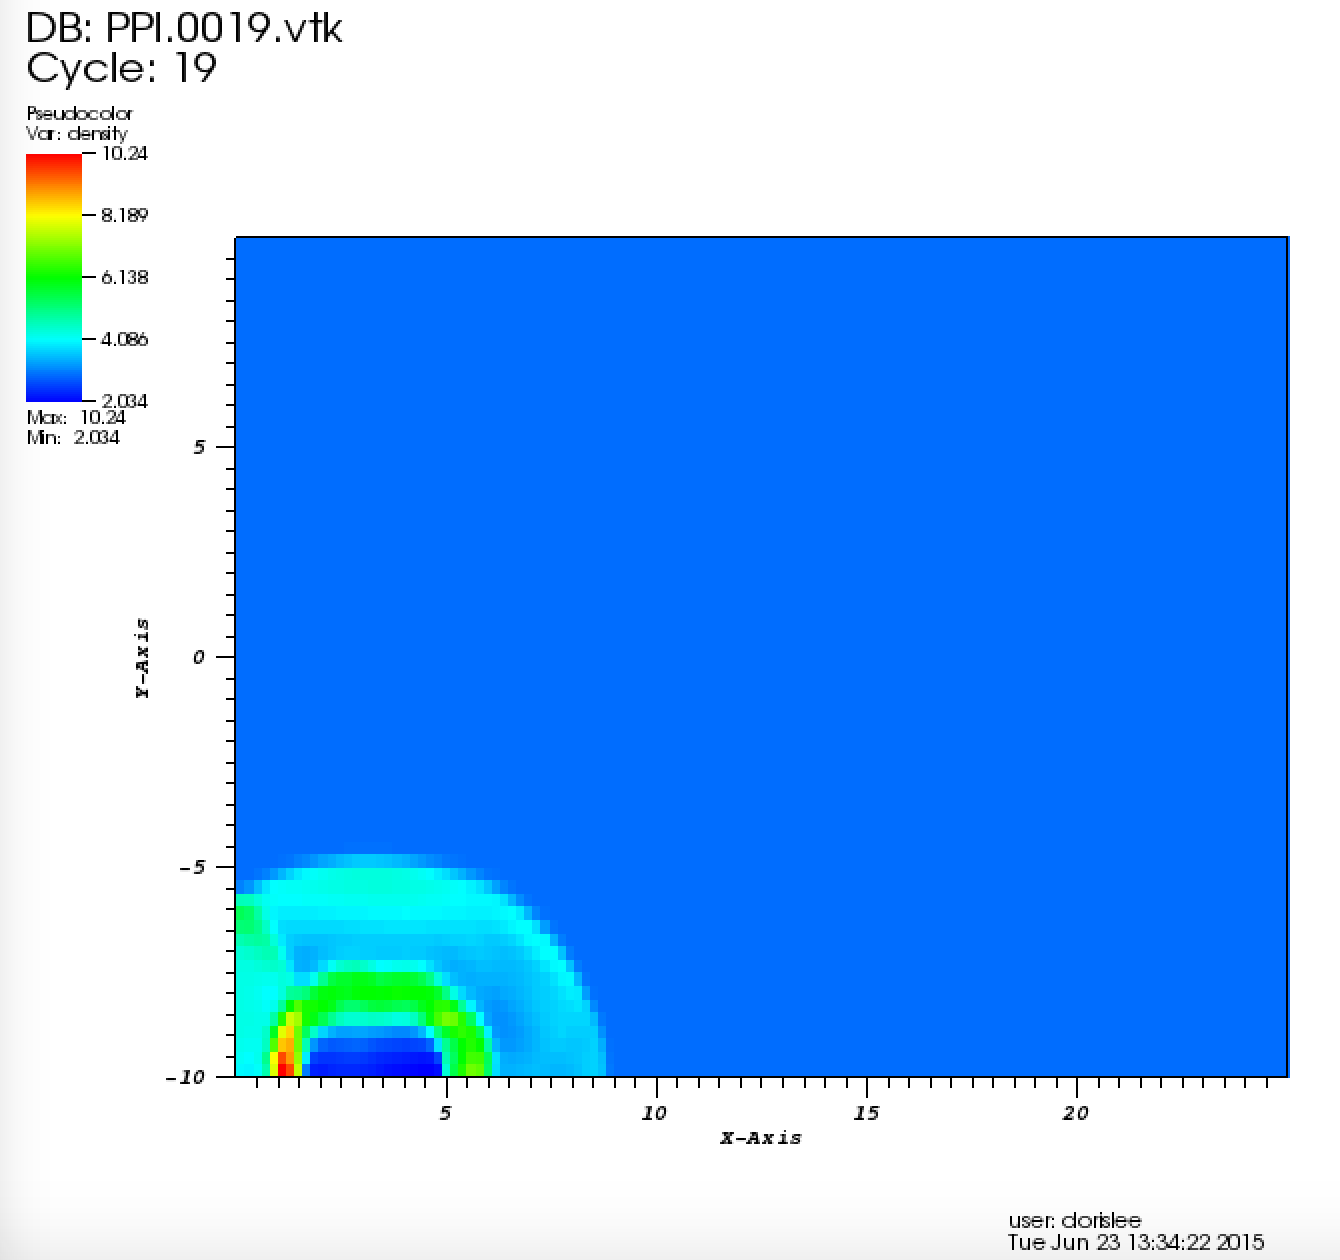

In [9]:
Image(filename='../test1/test1.png',width=500) 

If I do x=j+10 I don't see anything. Not too sure why.'

Need to figure out B.C. too..
